In [2]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

In [3]:
filename = "dataset_v1.csv"
df = pd.read_csv(filename)
# #df = df.dropna(subset=['host_is_superhost', 'bedrooms', 'bathrooms',
#                        'beds', 'review_scores_accuracy',
#                        'review_scores_cleanliness', 'review_scores_checkin',
#                        'review_scores_location', 'review_scores_value'])
df.isnull().sum()

id                                 0
host_is_superhost                  0
property_type                      0
room_type                          0
price                              0
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
reviews_per_month                  4
review_scores_rating               4
review_scores_accuracy             9
review_scores_cleanliness          8
review_scores_checkin             34
review_scores_communication       14
review_scores_location            35
review_scores_value               40
calculated_host_listings_count     0
availability_365                   0
beds                              14
bed_type                           0
bedrooms                           4
bathrooms                          6
accommodates                       0
TV                                 0
Wifi                               0
F

In [4]:
df.columns

Index(['id', 'host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'availability_365', 'beds',
       'bed_type', 'bedrooms', 'bathrooms', 'accommodates', 'TV', 'Wifi',
       'Free street parking', 'Kitchen', 'Shampoo', 'Air conditioning',
       'Hair dryer', 'Self check-in', 'room_type_1', 'property_type_1',
       'bed_type_1'],
      dtype='object')

In [5]:
df.dtypes

id                                  int64
host_is_superhost                   int64
property_type                      object
room_type                          object
price                               int64
guests_included                     int64
extra_people                        int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count      int64
availability_365                    int64
beds                              float64
bed_type                           object
bedrooms                          float64
bathrooms                         

In [6]:
# first glance at the data itself
print('Total size:', df.shape)
df.head(5).append(df.tail(5))

Total size: (22644, 36)


id  host_is_superhost property_type        room_type  price  \
0         12351                  0     Townhouse     Private room    100   
1         14250                  0         House  Entire home/apt    471   
2         15253                  0     Apartment     Private room    109   
3         20865                  1         House  Entire home/apt    450   
4         26174                  0     Apartment     Private room     62   
22639  29442472                  1     Apartment  Entire home/apt    179   
22640  29442523                  1          Loft  Entire home/apt    174   
22641  29442546                  0         House     Private room     50   
22642  29442558                  0     Apartment  Entire home/apt    195   
22643  29446814                  0     Apartment  Entire home/apt    130   

       guests_included  extra_people  minimum_nights  maximum_nights  \
0                    2           395               2               7   
1                    6            40               5              22   
2                    1            10               2               7   
3                    6             0               7             365   
4                    1            15               1              60   
22639                1             0               1            1125   
22640                1             0               1            1125   
22641                1            18               1            1125   
22642                1             0               1            1125   
22643                1             0               3            1125   

       number_of_reviews  ...  Wifi  Free street parking  Kitchen  Shampoo  \
0                    493  ...     1                    0        0        1   
1                      1  ...     1                    1        1        1   
2                    300  ...     1                    1        1        1   
3                     15  ...     1                    0        1        1   
4                     42  ...     1                    1        1        0   
22639                  4  ...     1                    0        1        1   
22640                  5  ...     1                    0        1        1   
22641                  3  ...     1                    0        1        1   
22642                  2  ...     1                    0        1        1   
22643                  1  ...     0                    0        1        0   

       Air conditioning  Hair dryer  Self check-in  room_type_1  \
0                     1           1              0            0   
1                     1           1              0            1   
2                     1           1              1            0   
3                     1           1              0            1   
4                     0           1              0            0   
22639                 1           1              0            1   
22640                 0           1              1            1   
22641                 1           0              0            0   
22642                 1           1              1            1   
22643                 0           0              0            1   

       property_type_1  bed_type_1  
0                    0           0  
1                    1           0  
2                    2           0  
3                    1           0  
4                    2           0  
22639                2           0  
22640                4           0  
22641                1           0  
22642                2           0  
22643                2           0  

[10 rows x 36 columns]

In [7]:
df.describe()

id  host_is_superhost         price  guests_included  \
count  2.264400e+04       22644.000000  22644.000000     22644.000000   
mean   1.654931e+07           0.180224    183.871003         1.670332   
std    7.896209e+06           0.384383    220.624767         1.378827   
min    1.235100e+04           0.000000      0.000000         1.000000   
25%    9.912084e+06           0.000000     80.000000         1.000000   
50%    1.760188e+07           0.000000    130.000000         1.000000   
75%    2.248453e+07           0.000000    199.000000         2.000000   
max    2.944681e+07           1.000000  10001.000000        16.000000   

       extra_people  minimum_nights  maximum_nights  number_of_reviews  \
count  22644.000000    22644.000000    22644.000000       22644.000000   
mean      13.212639        4.224828      682.165033          19.381028   
std       23.708109       14.035419      546.949293          34.229915   
min        0.000000        1.000000        1.000000           0.000000   
25%        0.000000        1.000000       30.000000           2.000000   
50%        0.000000        2.000000     1125.000000           6.000000   
75%       20.000000        4.000000     1125.000000          20.000000   
max      410.000000      700.000000    10000.000000         493.000000   

       reviews_per_month  review_scores_rating  ...          Wifi  \
count       22640.000000          22640.000000  ...  22644.000000   
mean            1.155476             93.464664  ...      0.940205   
std             1.549142              9.550227  ...      0.237112   
min             0.010000             20.000000  ...      0.000000   
25%             0.150000             91.000000  ...      1.000000   
50%             0.490000             96.000000  ...      1.000000   
75%             1.570000            100.000000  ...      1.000000   
max            15.180000            100.000000  ...      1.000000   

       Free street parking       Kitchen       Shampoo  Air conditioning  \
count         22644.000000  22644.000000  22644.000000      22644.000000   
mean              0.306792      0.949567      0.728979          0.450936   
std               0.461173      0.218841      0.444497          0.497598   
min               0.000000      0.000000      0.000000          0.000000   
25%               0.000000      1.000000      0.000000          0.000000   
50%               0.000000      1.000000      1.000000          0.000000   
75%               1.000000      1.000000      1.000000          1.000000   
max               1.000000      1.000000      1.000000          1.000000   

         Hair dryer  Self check-in   room_type_1  property_type_1  \
count  22644.000000   22644.000000  22644.000000     22644.000000   
mean       0.710078       0.274731      0.677751         2.319113   
std        0.453736       0.446388      0.491124         2.639778   
min        0.000000       0.000000      0.000000         0.000000   
25%        0.000000       0.000000      0.000000         1.000000   
50%        1.000000       0.000000      1.000000         2.000000   
75%        1.000000       1.000000      1.000000         2.000000   
max        1.000000       1.000000      2.000000        35.000000   

         bed_type_1  
count  22644.000000  
mean       0.011350  
std        0.160334  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 33 columns]

## The table above can tell some important things:
- **1**: we have different units of data(int, float, object)
- **2**: some datapoints are missing
- **3**: some variables' distributions are skewed.


## Missing values
- in this section, the main task is treating missing values.

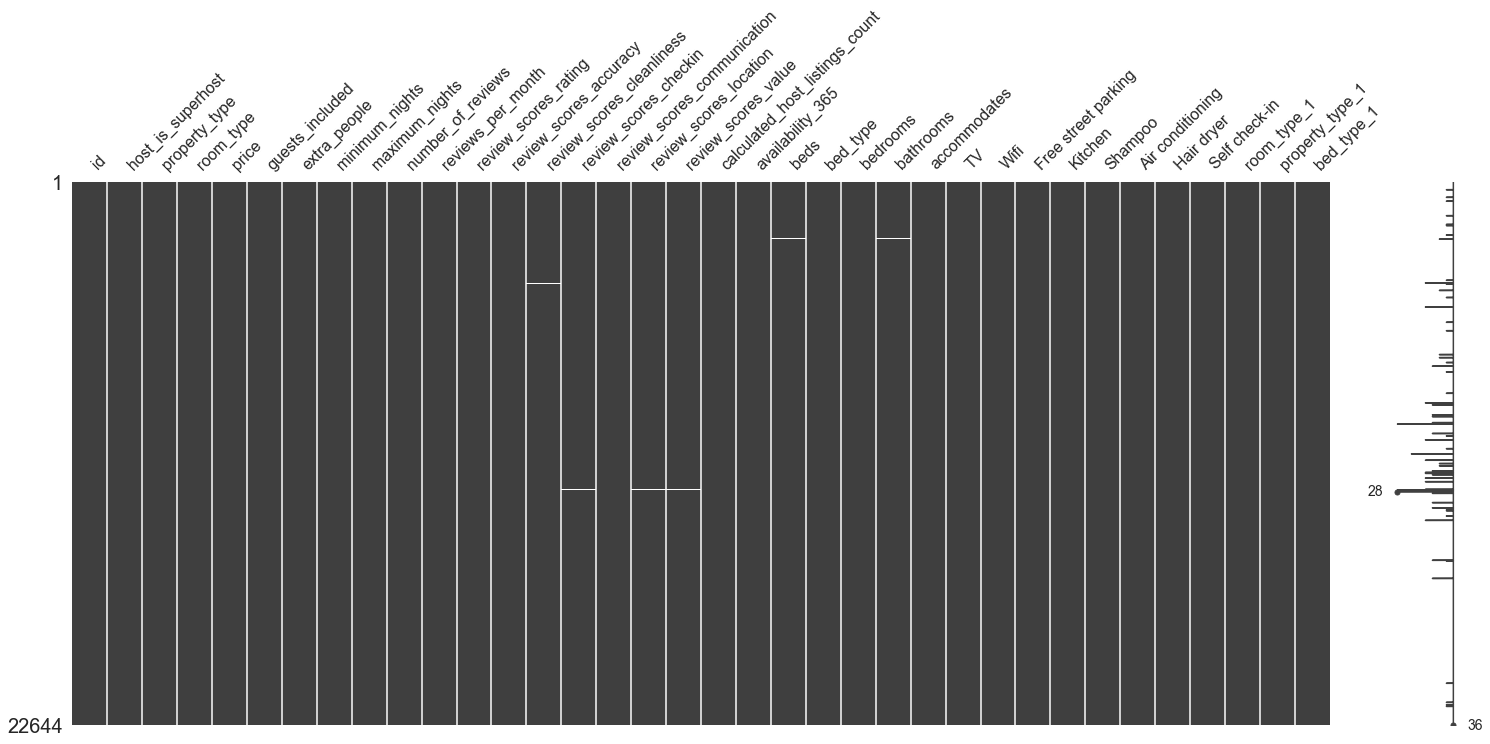

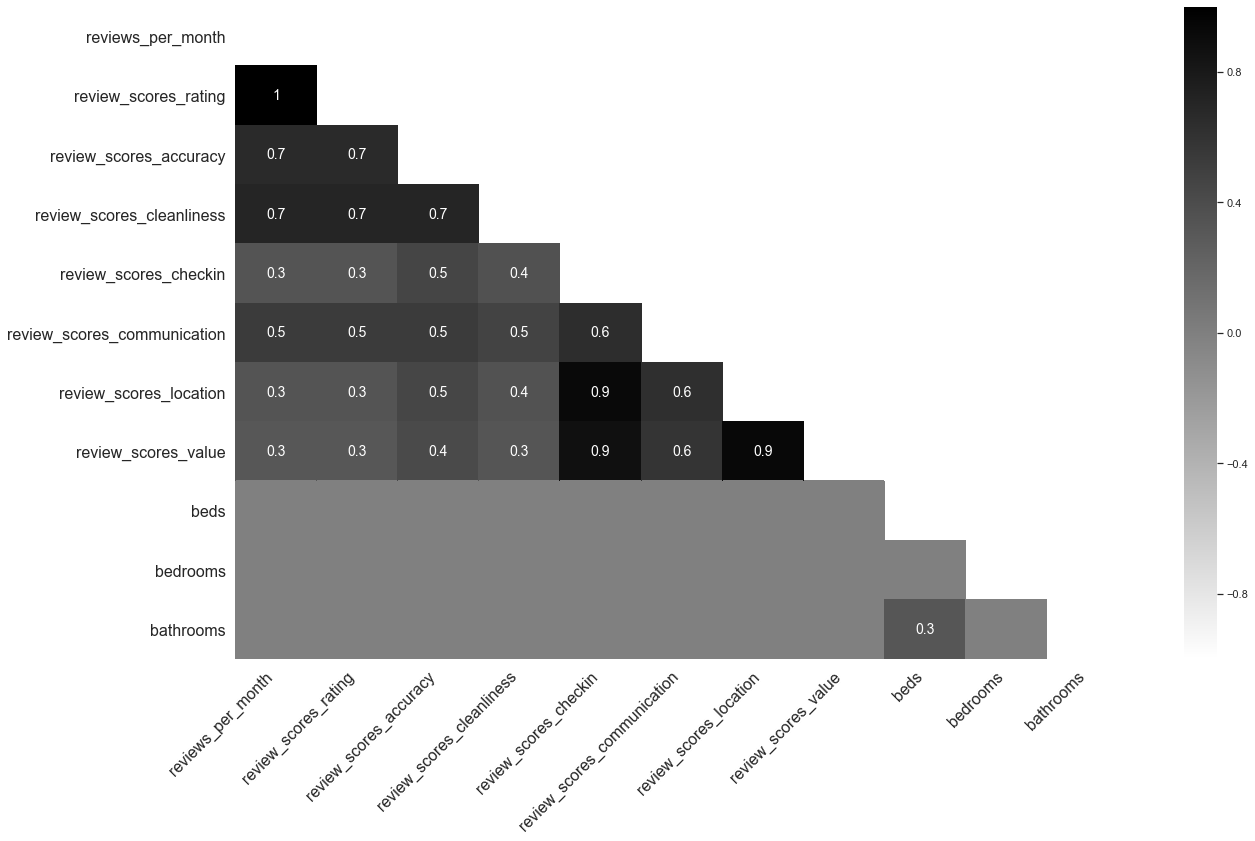

In [8]:
seed = 123
sns.set(style = "ticks")

msno.matrix(df)
msno.heatmap(df, cmap = 'binary')

More or less clean dataset with occasional missing values. 
- thought on dealing with the missing values is replaced by their grouped medians

In [9]:
# missing values in reviews_score_value
df[pd.isnull(df['review_scores_value'])].head()

id  host_is_superhost property_type        room_type  price  \
4215   8356300                  0     Apartment  Entire home/apt    136   
4823   9215747                  0     Apartment  Entire home/apt    150   
5220   9583063                  0     Apartment  Entire home/apt    275   
7201  12762013                  0         House  Entire home/apt    496   
7532  13318796                  0     Apartment      Shared room    100   

      guests_included  extra_people  minimum_nights  maximum_nights  \
4215                1             0               7            1125   
4823                1             0               1            1125   
5220                1             0               7            1125   
7201                1             0               5             200   
7532                1             0               2              26   

      number_of_reviews  ...  Wifi  Free street parking  Kitchen  Shampoo  \
4215                  1  ...     1                    0        1        0   
4823                  1  ...     0                    0        1        0   
5220                  1  ...     1                    0        1        1   
7201                  1  ...     1                    0        1        0   
7532                  1  ...     1                    0        1        0   

      Air conditioning  Hair dryer  Self check-in  room_type_1  \
4215                 0           0              0            1   
4823                 1           0              0            1   
5220                 0           1              0            1   
7201                 0           1              1            1   
7532                 0           1              0            2   

      property_type_1  bed_type_1  
4215                2           0  
4823                2           0  
5220                2           0  
7201                1           0  
7532                2           1  

[5 rows x 36 columns]

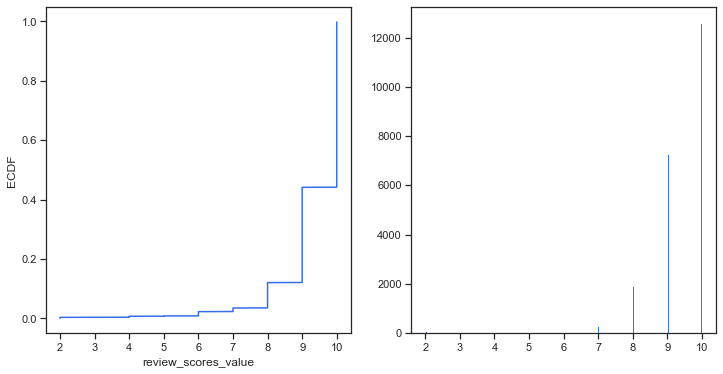

In [10]:
sns.set(style = "ticks")
plt.figure(figsize = (12, 6)) 
c = '#366DE8'

# ECDF
plt.subplot(121)
cdf = ECDF(df['review_scores_value'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('review_scores_value'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(df['review_scores_value'].dropna(), 
         bins = int(np.sqrt(len(df['review_scores_value']))),
         color = c);

- seems these missing data would effect little

In [11]:
df.groupby('review_scores_checkin')['review_scores_value'].describe()

count      mean       std  min   25%   50%    75%  \
review_scores_checkin                                                        
2.0                       57.0  3.578947  2.528038  2.0  2.00   2.0   6.00   
3.0                        2.0  3.500000  0.707107  3.0  3.25   3.5   3.75   
4.0                       38.0  6.105263  2.227463  2.0  4.00   6.0   8.00   
5.0                       18.0  6.111111  1.967049  2.0  5.25   7.0   7.00   
6.0                      162.0  7.067901  2.097400  2.0  6.00   7.0   8.00   
7.0                      117.0  7.837607  1.413953  3.0  7.00   8.0   9.00   
8.0                      763.0  8.212320  1.623969  2.0  8.00   8.0   9.00   
9.0                     2729.0  8.924881  0.761905  4.0  9.00   9.0   9.00   
10.0                   18716.0  9.520624  0.789357  2.0  9.00  10.0  10.00   

                        max  
review_scores_checkin        
2.0                    10.0  
3.0                     4.0  
4.0                    10.0  
5.0                     9.0  
6.0                    10.0  
7.0                    10.0  
8.0                    10.0  
9.0                    10.0  
10.0                   10.0

In [12]:
df1 = df.dropna(subset=['host_is_superhost', 'bedrooms', 'bathrooms',
                       'beds', 'review_scores_accuracy',
                       'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_location', 'review_scores_value'])
df1 = df1.drop(['id'],axis = 1)

In [13]:
df1.isnull().sum()

host_is_superhost                 0
property_type                     0
room_type                         0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
availability_365                  0
beds                              0
bed_type                          0
bedrooms                          0
bathrooms                         0
accommodates                      0
TV                                0
Wifi                              0
Free street parking               0
Kitchen                     

## feature selection and correlations
- Before encoding classes into numeric values, we can drop few highly correlated to the target variables. We do that in order to avoid large features weights in the model building.

- Data selection (dropping features)(Probably PCA is a better choice, we will do it if having more time)

In [14]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df1, 20)

FirstVariable               SecondVariable  Correlation
0                          beds                 accommodates     0.879195
1                      bedrooms                 accommodates     0.791482
2                          beds                     bedrooms     0.755031
3          review_scores_rating       review_scores_accuracy     0.734298
4          review_scores_rating    review_scores_cleanliness     0.732491
5          review_scores_rating          review_scores_value     0.731672
6         review_scores_checkin  review_scores_communication     0.684778
7        review_scores_accuracy          review_scores_value     0.668382
8        review_scores_accuracy    review_scores_cleanliness     0.628312
9     review_scores_cleanliness          review_scores_value     0.627054
10            number_of_reviews            reviews_per_month     0.621704
11         review_scores_rating  review_scores_communication     0.620584
12                     bedrooms                    bathrooms     0.610969
13       review_scores_accuracy  review_scores_communication     0.584920
14                    bathrooms                 accommodates     0.577995
15         review_scores_rating        review_scores_checkin     0.563555
16                         beds                    bathrooms     0.563550
17  review_scores_communication          review_scores_value     0.547778
18       review_scores_accuracy        review_scores_checkin     0.541289
19                        price                 accommodates     0.532842

It seem like beds and bedrooms are highly correlated to the variable accommodates. We also see that beds and bedrooms are highly correlated. These corrlated features could lead to unbalanced model fitting.
- we can drop these correlated features

In [15]:
columns = ['beds', 'bedrooms', 'review_scores_accuracy','review_scores_cleanliness','review_scores_value', 'TV',
       'Wifi', 'Free street parking', 'Kitchen','reviews_per_month', 'Shampoo', 'Air conditioning','review_scores_communication',
       'Hair dryer', 'Self check-in', 'room_type_1', 'property_type_1','extra_people', 'minimum_nights','maximum_nights'
       ,'bed_type_1','availability_365']
df1 = df1.drop(columns, axis = 1)

In [16]:
df1.columns

Index(['host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'number_of_reviews', 'review_scores_rating',
       'review_scores_checkin', 'review_scores_location',
       'calculated_host_listings_count', 'bed_type', 'bathrooms',
       'accommodates'],
      dtype='object')

- next step is look other variables correlations

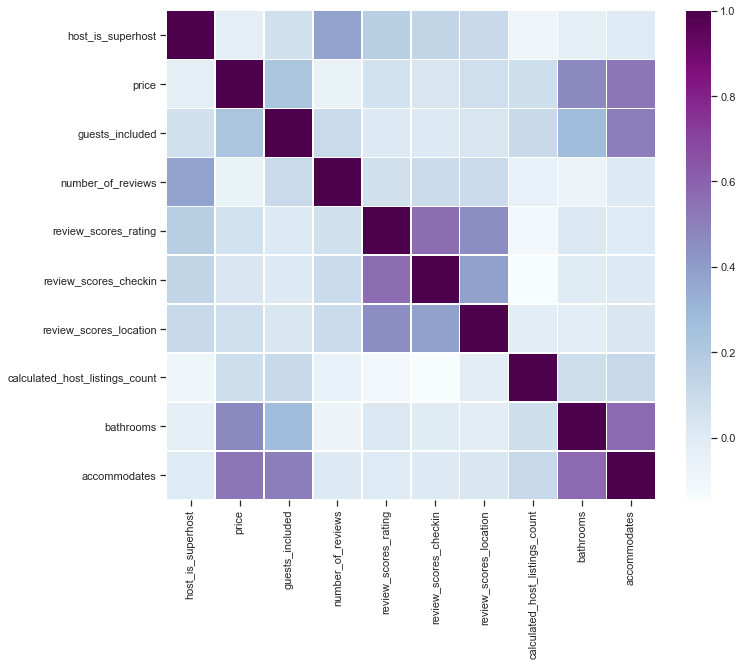

In [17]:

# Compute the correlation matrix 
corr_all = df1.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

- it seems like review_scores_communication has a strong linear-like correlation with variable review_scores_rating and review_scores_checkin
- we can also plot the scatters for every continious variable in the dataset against each other

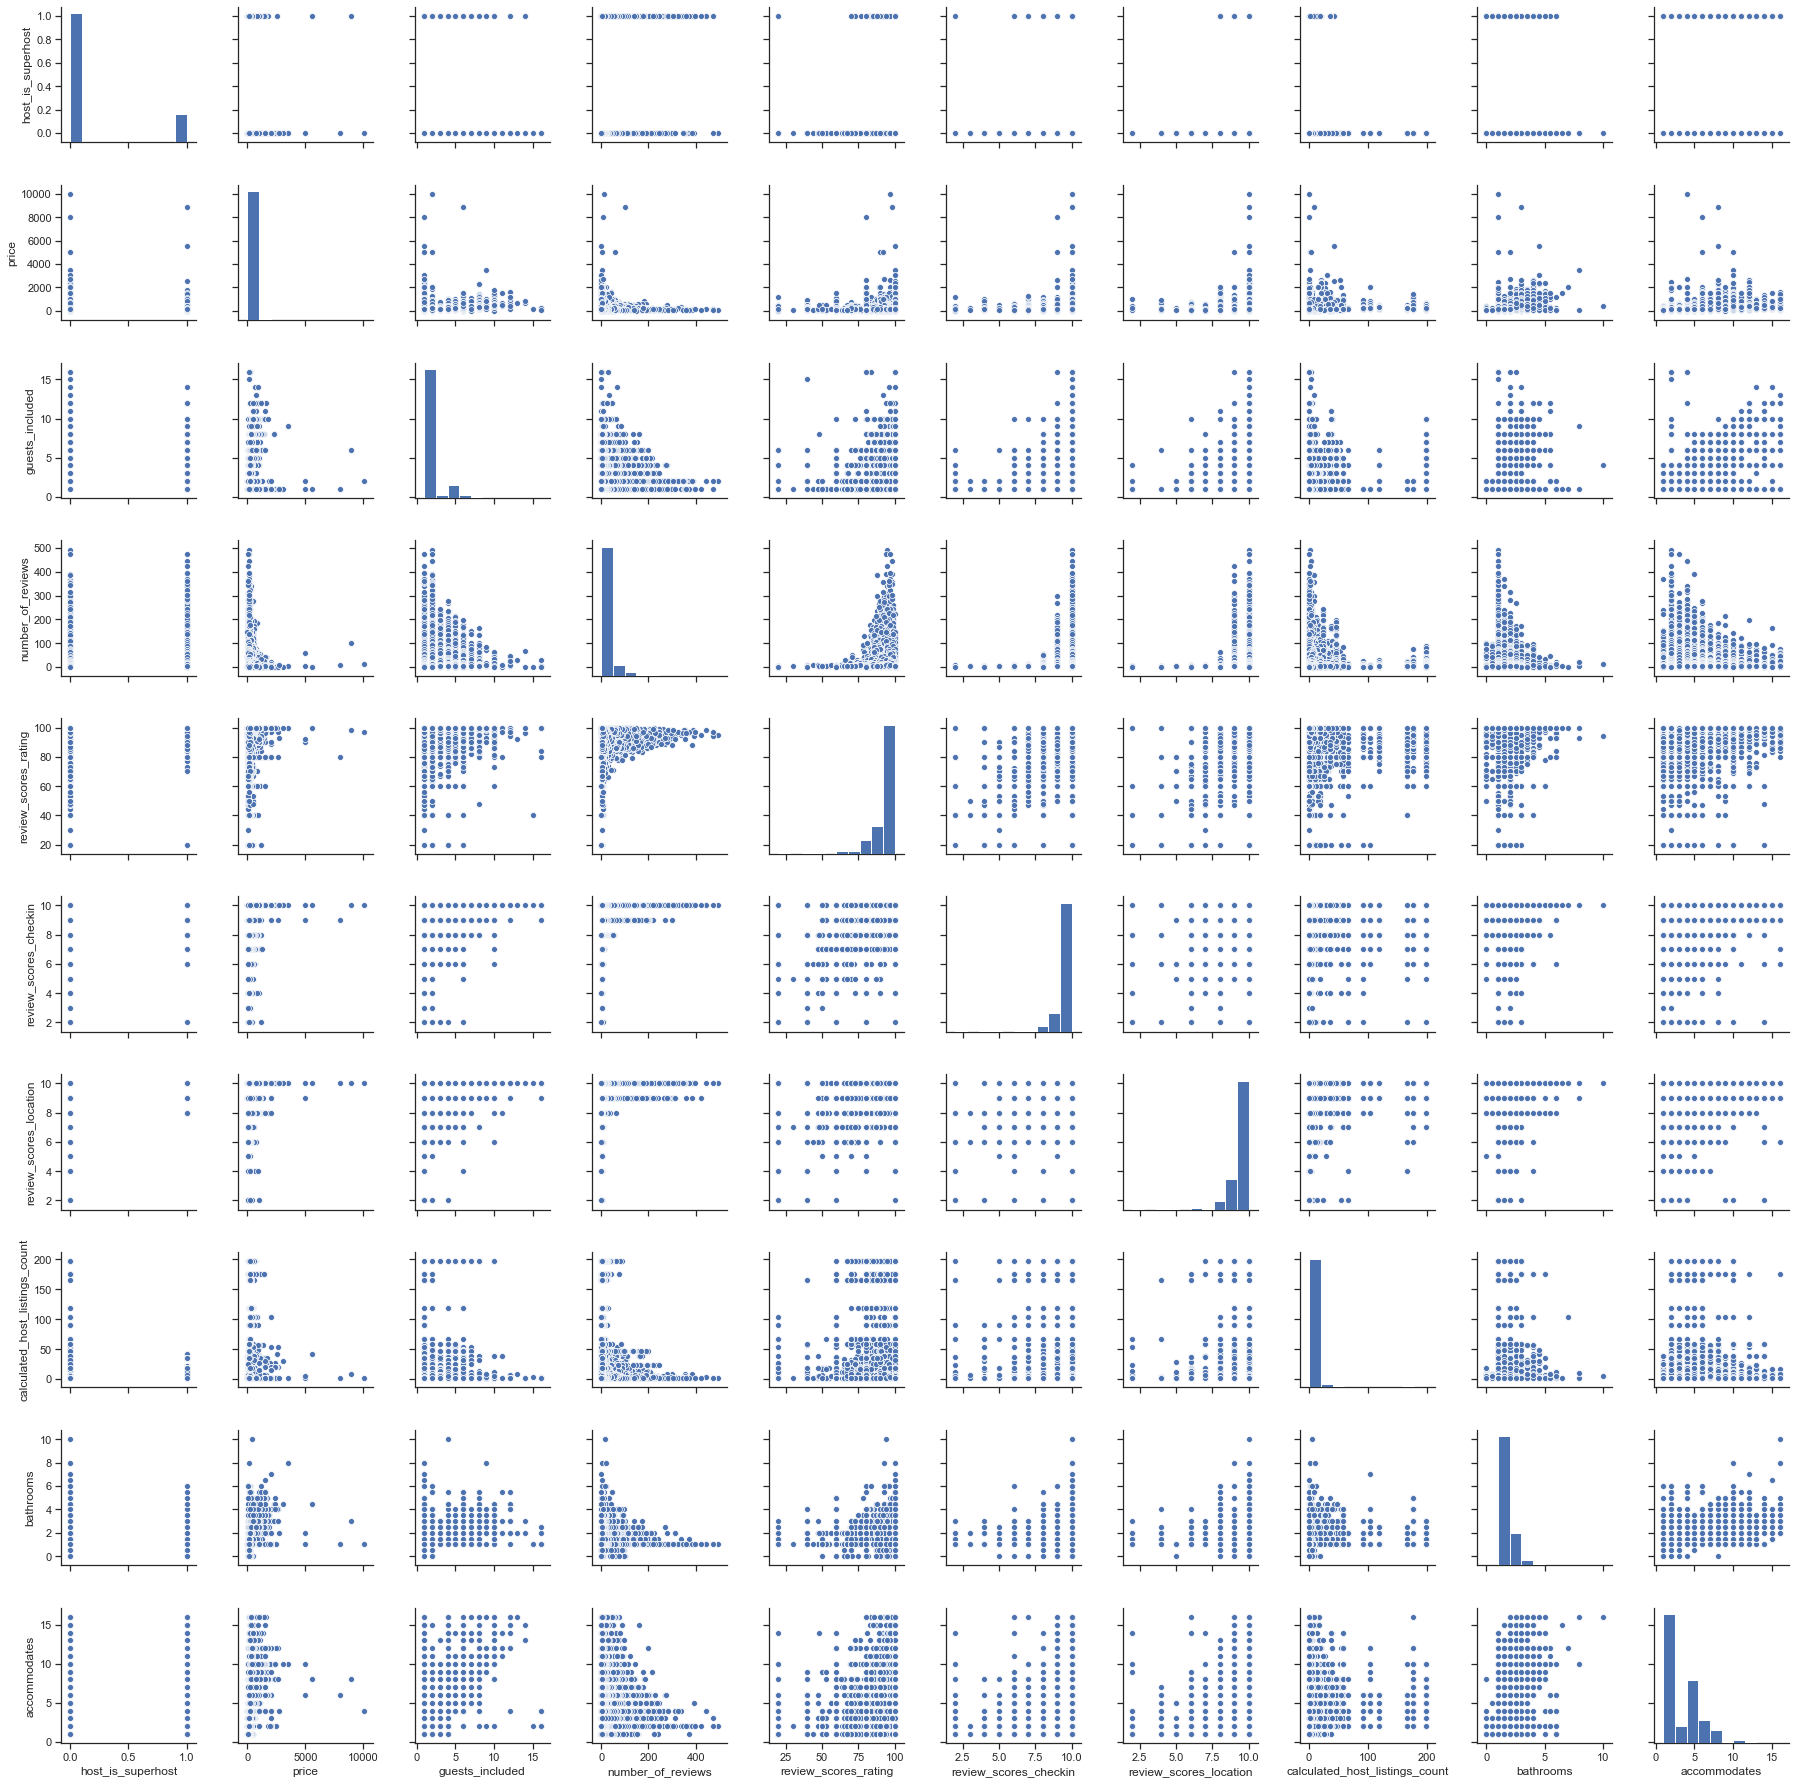

In [18]:
sns_plot = sns.pairplot(df1)
sns_plot.savefig('seaborn output.png')

- the graph above not noly reveal present trends in the dataset, but also shows the forms of each distribution. 
- out of curiously, we can take a look at the relationship between price and accommodates variable.  

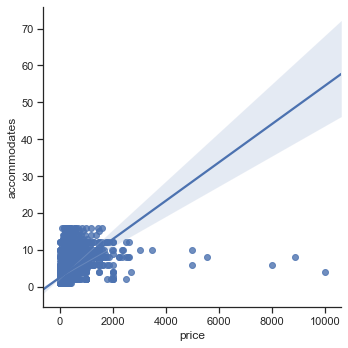

In [19]:
sns.lmplot('price','accommodates',df1, fit_reg= True)

Indeed we can see an increase in the number of accommondates of a unit is associated with a proportional increase in its price. 

In [20]:
df1.shape

(22579, 13)

In [21]:
def missingValueCheck(data):
    column_name = data.columns # get column names
    #print(column_name)
    samples = data.shape[0] # number of samples
    print(samples)
    cols = data.shape[1] 
    for i in column_name:
        count = data[i].isin(['?']).sum() # count how many missing values
        if count != 0:
            pct = float(count)/samples*100 # compute the percentage of missing values
            print(str(i)+ ': '+ "{0:.4f}%".format(pct))

In [22]:
# Missing value check for train data
missingValueCheck(df)

22644


- ['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa', 'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 'Aparthotel', 'Yurt', 'Hut', 'Barn']
- ['Private room', 'Entire home/apt', 'Shared room']
- ['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch']


In [23]:
df1.replace(['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa',
            'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 
            'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 
            'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 
            'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 
            'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 
            'Aparthotel', 'Yurt', 'Hut', 'Barn'],
                 ['Townhouse', 'House','Apartment','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other'], 
                 inplace = True)

In [24]:
# Select numerical data and standardised them
cols_norm = ['host_is_superhost', 'price', 'guests_included', 'number_of_reviews','review_scores_rating',
             'review_scores_checkin','review_scores_location','calculated_host_listings_count','bathrooms','accommodates']
df1[cols_norm] = df1[cols_norm].apply(lambda x: (x-np.mean(x))/np.std(x))


In [25]:
# Get cols that need to be converted to dummies
cols_dummy = ['property_type', 'room_type','bed_type']
# Change to dummies
dummy_features = pd.get_dummies(df1[cols_dummy])
# print(dummy_features)
# Concat dummy variables with columns kept
df1 = pd.concat([df1[cols_norm],dummy_features],axis=1)

Exclude dependent variable ( price)

In [26]:
dependent_var = df1["price"].values
df1.drop(["price"], axis=1, inplace=True)

In [27]:
pd.value_counts(pd.Series(dependent_var))/df1.shape[0]

-0.153457     0.046415
-0.380071     0.043846
 0.068625     0.037557
-0.289426     0.030161
-0.561363     0.029496
 0.304304     0.025732
-0.511508     0.024182
-0.470717     0.023960
-0.606686     0.022765
-0.339281     0.020151
-0.017488     0.019133
-0.425394     0.019089
 0.526386     0.018601
-0.538701     0.018070
-0.584024     0.017450
-0.244103     0.016431
-0.493378     0.016387
-0.452588     0.016343
-0.198780     0.016165
-0.103602     0.013730
-0.624815     0.013375
-0.266764     0.013287
-0.398200     0.013065
 0.027834     0.012401
 0.753000     0.012312
 0.163803     0.010807
 0.979614     0.009522
-0.652008     0.009478
-0.062811     0.009124
-0.176118     0.008858
                ...   
 0.635161     0.000044
 3.381726     0.000044
 7.261362     0.000044
 1.056663     0.000044
 11.313226    0.000044
 1.369391     0.000044
 2.090024     0.000044
 1.954056     0.000044
 2.207864     0.000044
 12.990172    0.000044
 39.445124    0.000044
 2.837852     0.000044
 1.188100  

In [28]:
# Convert dataframe to array type for easy handling
arr_df1 = np.array(df1)
print(arr_df1.shape)

(22579, 21)


In [29]:
arr_df1

array([[-0.46934913,  0.23843832, 13.82678985, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913,  3.13874748, -0.53756747, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897,  8.19199114, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.46934913, -0.48663897, -0.47917578, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897, -0.50837162, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897, -0.53756747, ...,  0.        ,
         0.        ,  1.        ]])

# predictive modelling
In this section we will use Random forest algorithm. 
- reason we choose this algorithm:
* Random Forest Regressor fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting by reducing the overall variance. It is one of the most popular machine learning algorithms and widely used by the community.

Before we doing the predictive, we need to do some preprocess work on the data first. 
- If a feature has a variance that is much larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. That is why we need to scale the data first.

Notice we have some variables whose type is not int or float. 
In order to use categorical variables in the model fitting we need to encode them into dummies.
* we can not just give these variables a score to show which is better than which, because this method is too optional. 

In this section, we split the dataset into train and test part. This method can reduce the validation error.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(arr_df1, dependent_var, 
                                                    test_size = 0.2,
                                                    random_state = 123)
print("X_Train", X_train.shape, "and X_test", X_test.shape)
print("y_Train", y_train.shape, "and y_test", y_test.shape)

X_Train (18063, 21) and X_test (4516, 21)
y_Train (18063,) and y_test (4516,)


In [31]:
y_train = y_train.ravel()
y_train = y_train.astype(int)

## Random Forest Regressor
- n_estimators: the number of trees to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance. In this case we take n_estimators = 300.
- max_features: the number of features to consider when looking for the best split. We already now that the percentage of relevant features is between 10-40%, so we take this range.
- min_samples_leaf : the minimum sample leaf size is highly dependent on the sample size. We will leave it at the default value of 2.
- max_depth: the maximum depth of the tree also depends on the sample size. More data - bigger the depth. Here, in the contrary, we have quite a big dataset so the range between 5 and 20 with a step of 1 will be enough.

 1) accommodates                   0.206121
 2) number_of_reviews              0.190180
 3) bathrooms                      0.150294
 4) review_scores_rating           0.108685
 5) calculated_host_listings_count 0.097376
 6) guests_included                0.080266
 7) review_scores_location         0.036456
 8) review_scores_checkin          0.027015
 9) property_type_House            0.025588
10) property_type_Apartment        0.022429
11) host_is_superhost              0.019254
12) room_type_Entire home/apt      0.010451
13) room_type_Private room         0.009156
14) property_type_Other            0.008812
15) property_type_Townhouse        0.005894
16) bed_type_Real Bed              0.000631
17) room_type_Shared room          0.000402
18) bed_type_Futon                 0.000344
19) bed_type_Couch                 0.000270
20) bed_type_Airbed                0.000257
21) bed_type_Pull-out Sofa         0.000118


/Users/fanbowen/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


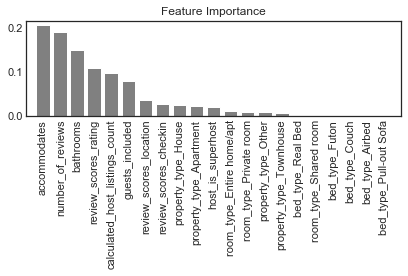

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Code Adapted from: Raschka, S. (2016).Python machine learning. PacktPublishing Ltd.

clf = RandomForestClassifier()
col_names = df1.columns.values

# print(col_names)

# Train random forest classifier
forest = clf.fit(X_train, y_train)

# Print the name and gini importance of each feature in decreasing order
importance = forest.feature_importances_
idx = np.argsort(importance)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i+1,30,col_names[idx[i]],importance[idx[i]]))
    
# Plot feature importance in decreasing order
plt.style.use('seaborn-white')
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importance[idx],color='grey',align='center')
plt.xticks(range(X_train.shape[1]), col_names[idx], rotation=90) # labels on x-axis
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature.png',format = 'png' )
plt.show()
plt.close()

select top 6 key features  
-  accommodates                   0.187295
-  number_of_reviews              0.181722
-  bathrooms                      0.169329
-  calculated_host_listings_count 0.100282
-  review_scores_rating           0.099128
-  guests_included                0.082216

In [33]:
new_df = df[['accommodates','number_of_reviews','bathrooms','calculated_host_listings_count'
            ,'review_scores_rating','guests_included']]

In [34]:
new_df.isnull().sum()


accommodates                      0
number_of_reviews                 0
bathrooms                         6
calculated_host_listings_count    0
review_scores_rating              4
guests_included                   0
dtype: int64

In [35]:
new_df = new_df.dropna(subset = ['bathrooms','review_scores_rating'])

In [36]:
from pandas import DataFrame
import sklearn.metrics as metrics
from sklearn import mixture 
import warnings
warnings.filterwarnings('ignore')

In [37]:
new_df.sample(10)

accommodates  number_of_reviews  bathrooms  \
3803              3                  2        1.0   
18809             1                  6        3.0   
2005              2                  7        1.0   
4036              7                  1        2.0   
6172              1                 28        1.5   
9613              2                  1        1.0   
17287             5                  2        1.0   
285               2                  4        1.0   
19865             2                  2        1.5   
15017             1                  6        1.0   

       calculated_host_listings_count  review_scores_rating  guests_included  
3803                                1                  70.0                1  
18809                               5                  77.0                1  
2005                                1                  91.0                1  
4036                                1                 100.0                1  
6172                                1                  96.0                1  
9613                                2                  80.0                1  
17287                              16                  90.0                1  
285                                 1                  90.0                1  
19865                               1                  90.0                1  
15017                               8                  70.0                1

In [38]:
new_df.isnull().sum()

accommodates                      0
number_of_reviews                 0
bathrooms                         0
calculated_host_listings_count    0
review_scores_rating              0
guests_included                   0
dtype: int64

In [39]:
new_df = new_df.dropna(subset = ['accommodates','number_of_reviews','guests_included',
                                 'calculated_host_listings_count','bathrooms','review_scores_rating'])

In [40]:
new_df.isnull().sum()


accommodates                      0
number_of_reviews                 0
bathrooms                         0
calculated_host_listings_count    0
review_scores_rating              0
guests_included                   0
dtype: int64

In [41]:
new_df

accommodates  number_of_reviews  bathrooms  \
0                 2                493        1.0   
1                 6                  1        3.0   
2                 2                300        1.0   
3                 8                 15        2.0   
4                 2                 42        1.0   
5                 2                 63        1.0   
6                 2                  6        1.0   
7                 2                 53        1.0   
8                11                 54        3.0   
9                 4                 17        1.0   
10                2                121        1.0   
11                4                229        1.0   
12                7                  6        3.5   
13                4                 23        1.0   
14                2                 53        1.0   
15                4                 11        1.0   
16                5                156        1.5   
17                2                 97        1.0   
18                4                  1        1.0   
19                2                 15        1.0   
20                2                 22        2.0   
21                2                  1        1.0   
22                4                 43        3.5   
23                4                  2        1.0   
24                2                  8        1.0   
25                2                367        1.0   
26               10                 13        5.0   
27                3                210        1.0   
28                2                 83        1.0   
29                6                269        2.5   
...             ...                ...        ...   
22614             5                  5        2.0   
22615             2                  1        1.0   
22616             2                  2        1.0   
22617             2                  1        1.0   
22618             1                  2        1.0   
22619             4                  7        1.0   
22620             6                  1        2.0   
22621             5                  4        2.0   
22622             4                  2        1.0   
22623             4                  1        1.0   
22624             7                  3        2.5   
22625             2                  1        1.0   
22626             1                  1        1.0   
22627             7                  3        2.0   
22628             4                  2        2.0   
22629             2                  4        1.0   
22630             6                  1        1.0   
22631             6                  3        1.5   
22632             8                  2        2.5   
22633             2                  7        1.0   
22634             2                  2        1.0   
22635             2                  3        1.0   
22636             4                  1        1.0   
22637             2                  1        1.0   
22638             2                  1        1.0   
22639             4                  4        2.0   
22640             5                  5        2.0   
22641             1                  3        1.0   
22642             5                  2        2.0   
22643             2                  1        1.0   

       calculated_host_listings_count  review_scores_rating  guests_included  
0                                   2                  95.0                2  
1                                   2                 100.0                6  
2                                   2                  88.0                1  
3                                   1                  96.0                6  
4                                   1                  94.0                1  
5                                   1                  97.0                2  
6                                   2                  87.0                1  
7                                   1                  98.0                1  
8        

In [42]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,2000,10000, 20000]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(new_df.loc[indices], columns = new_df.keys()).reset_index(drop = True)
print("Chosen samples of dataset:" )
display(samples)

Chosen samples of dataset:


accommodates  number_of_reviews  bathrooms  calculated_host_listings_count  \
0             2                493        1.0                               2   
1             6                177        2.0                               1   
2             2                  4        1.0                               1   
3             3                  1        1.0                               1   

   review_scores_rating  guests_included  
0                  95.0                2  
1                  95.0                6  
2                  95.0                1  
3                 100.0                1

In [43]:
new_df.isnull().sum()

accommodates                      0
number_of_reviews                 0
bathrooms                         0
calculated_host_listings_count    0
review_scores_rating              0
guests_included                   0
dtype: int64

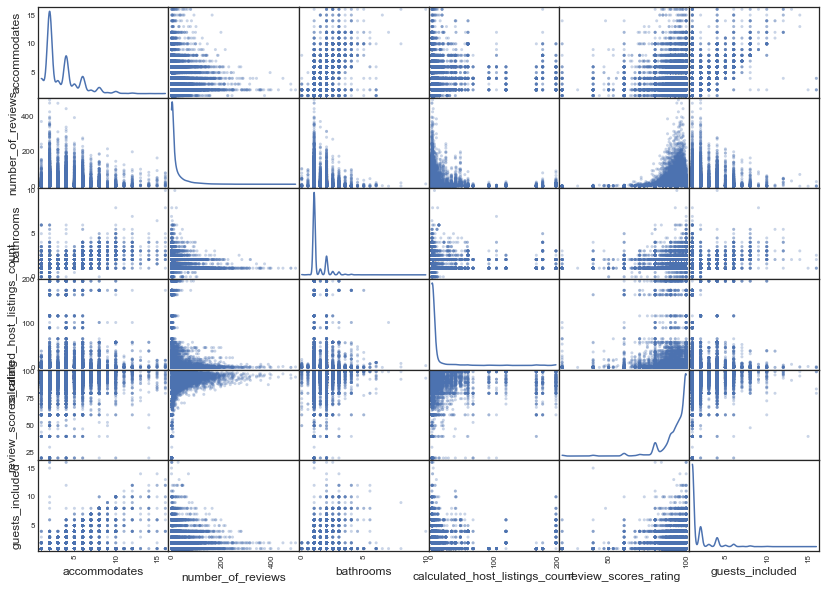

In [44]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(new_df, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

In [45]:
log_data = np.log(new_df)
log_samples = np.log(samples)
from IPython.display import display
display(samples)
display(log_samples)

accommodates  number_of_reviews  bathrooms  calculated_host_listings_count  \
0             2                493        1.0                               2   
1             6                177        2.0                               1   
2             2                  4        1.0                               1   
3             3                  1        1.0                               1   

   review_scores_rating  guests_included  
0                  95.0                2  
1                  95.0                6  
2                  95.0                1  
3                 100.0                1

accommodates  number_of_reviews  bathrooms  calculated_host_listings_count  \
0      0.693147           6.200509   0.000000                        0.693147   
1      1.791759           5.176150   0.693147                        0.000000   
2      0.693147           1.386294   0.000000                        0.000000   
3      1.098612           0.000000   0.000000                        0.000000   

   review_scores_rating  guests_included  
0              4.553877         0.693147  
1              4.553877         1.791759  
2              4.553877         0.000000  
3              4.605170         0.000000

In [46]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

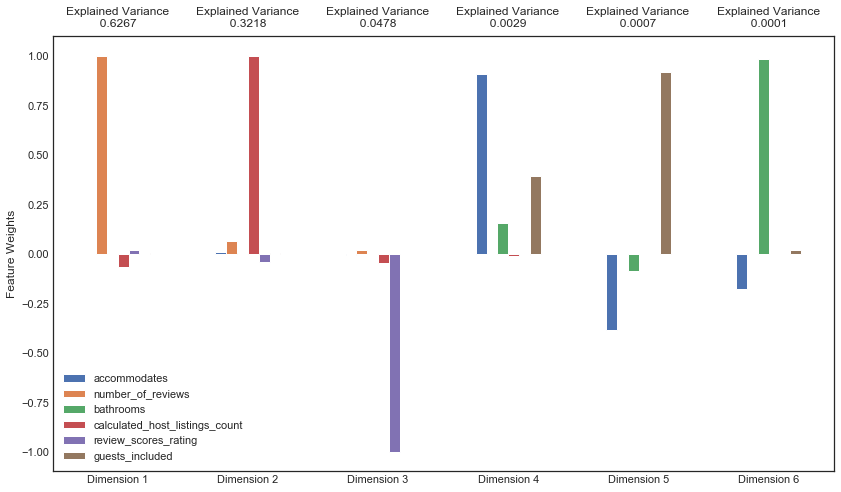

In [48]:

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=new_df.shape[1])
pca.fit(new_df)
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = pca_results(new_df, pca)

# print pca_results['Explained Variance'].cumsum()

In [49]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0     -14.6029      -3.3537      88.8742      -2.5508       0.3635   
1     -15.5769      -4.0926      88.8780      -1.0062       0.8995   
2     -19.3639      -4.3632      88.8205      -2.8041      -0.2561   
3     -20.7458      -4.4519      88.7426      -2.4338      -0.4063   

   Dimension 6  
0      -0.7171  
1      -0.2109  
2      -0.7360  
3      -0.8097

In [50]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(new_df)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(new_df)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0     -14.6029      -3.3537
1     -15.5769      -4.0926
2     -19.3639      -4.3632
3     -20.7458      -4.4519

In [51]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

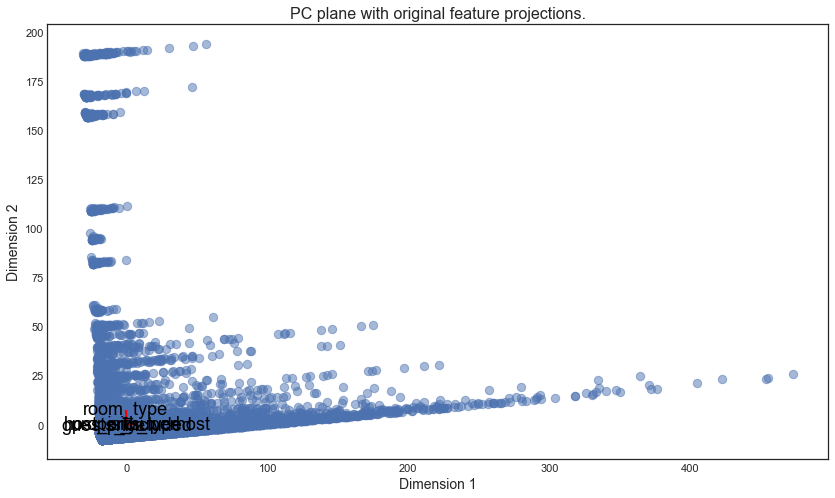

In [52]:
# Create a biplot
biplot(df, reduced_data, pca)

In [53]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
components = np.arange(2,10)
from sklearn import mixture
max_silhouette_score = 0
chosen_num_components = 0
for num_components in components:
    clusterer = mixture.GaussianMixture(n_components=num_components,random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print ("The silhouette score for {} clusters is {}.".format(num_components, score))
    if max_silhouette_score < score:
        max_silhouette_score = score
        chosen_num_components = num_components

if (chosen_num_components != components[-1]):
    clusterer = mixture.GaussianMixture(n_components=chosen_num_components,random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = max_silhouette_score

The silhouette score for 2 clusters is 0.4094306626393572.
The silhouette score for 3 clusters is 0.35266302314627124.
The silhouette score for 4 clusters is 0.2881462825862392.
The silhouette score for 5 clusters is 0.24157118309772146.
The silhouette score for 6 clusters is 0.16566937759128106.
The silhouette score for 7 clusters is 0.15504279763114387.
The silhouette score for 8 clusters is 0.1509300780307382.
The silhouette score for 9 clusters is 0.14173859172202574.


In [54]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = plt.cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

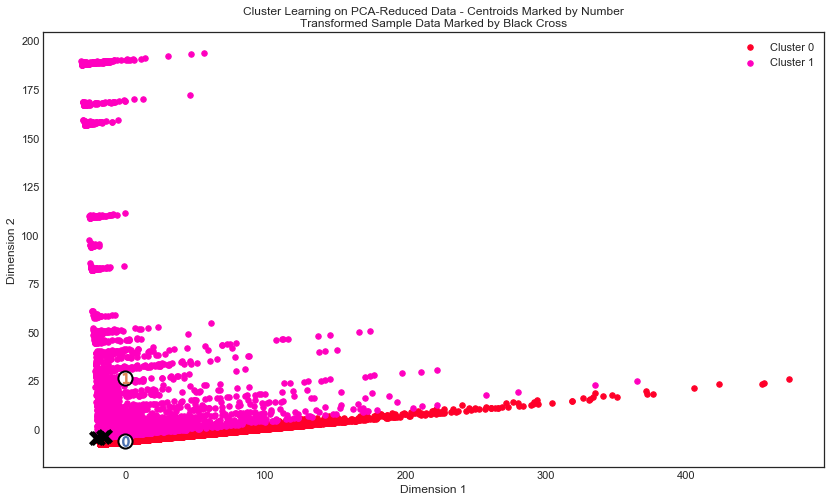

In [55]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

In [60]:
sample_preds

array([1, 1, 1, 1])

In [63]:
# Display the predictions
id_list = []
cluster_list = []
for i, pred in enumerate(preds):
    print("id", i, "predicted to be in Cluster", pred)
    id_list.append(i)
    cluster_list.append(pred)

id 0 predicted to be in Cluster 0
id 1 predicted to be in Cluster 0
id 2 predicted to be in Cluster 0
id 3 predicted to be in Cluster 0
id 4 predicted to be in Cluster 0
id 5 predicted to be in Cluster 0
id 6 predicted to be in Cluster 0
id 7 predicted to be in Cluster 0
id 8 predicted to be in Cluster 1
id 9 predicted to be in Cluster 1
id 10 predicted to be in Cluster 0
id 11 predicted to be in Cluster 0
id 12 predicted to be in Cluster 0
id 13 predicted to be in Cluster 0
id 14 predicted to be in Cluster 0
id 15 predicted to be in Cluster 0
id 16 predicted to be in Cluster 1
id 17 predicted to be in Cluster 0
id 18 predicted to be in Cluster 0
id 19 predicted to be in Cluster 0
id 20 predicted to be in Cluster 0
id 21 predicted to be in Cluster 0
id 22 predicted to be in Cluster 0
id 23 predicted to be in Cluster 1
id 24 predicted to be in Cluster 0
id 25 predicted to be in Cluster 0
id 26 predicted to be in Cluster 0
id 27 predicted to be in Cluster 0
id 28 predicted to be in Clust

id 936 predicted to be in Cluster 0
id 937 predicted to be in Cluster 0
id 938 predicted to be in Cluster 0
id 939 predicted to be in Cluster 0
id 940 predicted to be in Cluster 0
id 941 predicted to be in Cluster 0
id 942 predicted to be in Cluster 0
id 943 predicted to be in Cluster 0
id 944 predicted to be in Cluster 0
id 945 predicted to be in Cluster 0
id 946 predicted to be in Cluster 0
id 947 predicted to be in Cluster 0
id 948 predicted to be in Cluster 0
id 949 predicted to be in Cluster 0
id 950 predicted to be in Cluster 1
id 951 predicted to be in Cluster 1
id 952 predicted to be in Cluster 1
id 953 predicted to be in Cluster 1
id 954 predicted to be in Cluster 0
id 955 predicted to be in Cluster 1
id 956 predicted to be in Cluster 0
id 957 predicted to be in Cluster 0
id 958 predicted to be in Cluster 0
id 959 predicted to be in Cluster 0
id 960 predicted to be in Cluster 0
id 961 predicted to be in Cluster 1
id 962 predicted to be in Cluster 0
id 963 predicted to be in Cl

id 1780 predicted to be in Cluster 0
id 1781 predicted to be in Cluster 0
id 1782 predicted to be in Cluster 0
id 1783 predicted to be in Cluster 0
id 1784 predicted to be in Cluster 0
id 1785 predicted to be in Cluster 0
id 1786 predicted to be in Cluster 0
id 1787 predicted to be in Cluster 0
id 1788 predicted to be in Cluster 0
id 1789 predicted to be in Cluster 0
id 1790 predicted to be in Cluster 0
id 1791 predicted to be in Cluster 0
id 1792 predicted to be in Cluster 1
id 1793 predicted to be in Cluster 0
id 1794 predicted to be in Cluster 0
id 1795 predicted to be in Cluster 0
id 1796 predicted to be in Cluster 0
id 1797 predicted to be in Cluster 0
id 1798 predicted to be in Cluster 0
id 1799 predicted to be in Cluster 0
id 1800 predicted to be in Cluster 1
id 1801 predicted to be in Cluster 1
id 1802 predicted to be in Cluster 0
id 1803 predicted to be in Cluster 0
id 1804 predicted to be in Cluster 0
id 1805 predicted to be in Cluster 0
id 1806 predicted to be in Cluster 0
i

id 2598 predicted to be in Cluster 1
id 2599 predicted to be in Cluster 0
id 2600 predicted to be in Cluster 0
id 2601 predicted to be in Cluster 0
id 2602 predicted to be in Cluster 0
id 2603 predicted to be in Cluster 1
id 2604 predicted to be in Cluster 0
id 2605 predicted to be in Cluster 0
id 2606 predicted to be in Cluster 0
id 2607 predicted to be in Cluster 0
id 2608 predicted to be in Cluster 0
id 2609 predicted to be in Cluster 0
id 2610 predicted to be in Cluster 0
id 2611 predicted to be in Cluster 0
id 2612 predicted to be in Cluster 0
id 2613 predicted to be in Cluster 0
id 2614 predicted to be in Cluster 0
id 2615 predicted to be in Cluster 0
id 2616 predicted to be in Cluster 0
id 2617 predicted to be in Cluster 0
id 2618 predicted to be in Cluster 0
id 2619 predicted to be in Cluster 0
id 2620 predicted to be in Cluster 0
id 2621 predicted to be in Cluster 0
id 2622 predicted to be in Cluster 0
id 2623 predicted to be in Cluster 0
id 2624 predicted to be in Cluster 0
i

id 3474 predicted to be in Cluster 0
id 3475 predicted to be in Cluster 0
id 3476 predicted to be in Cluster 1
id 3477 predicted to be in Cluster 0
id 3478 predicted to be in Cluster 0
id 3479 predicted to be in Cluster 0
id 3480 predicted to be in Cluster 0
id 3481 predicted to be in Cluster 1
id 3482 predicted to be in Cluster 0
id 3483 predicted to be in Cluster 0
id 3484 predicted to be in Cluster 0
id 3485 predicted to be in Cluster 1
id 3486 predicted to be in Cluster 0
id 3487 predicted to be in Cluster 1
id 3488 predicted to be in Cluster 0
id 3489 predicted to be in Cluster 0
id 3490 predicted to be in Cluster 0
id 3491 predicted to be in Cluster 0
id 3492 predicted to be in Cluster 0
id 3493 predicted to be in Cluster 0
id 3494 predicted to be in Cluster 0
id 3495 predicted to be in Cluster 0
id 3496 predicted to be in Cluster 0
id 3497 predicted to be in Cluster 0
id 3498 predicted to be in Cluster 0
id 3499 predicted to be in Cluster 0
id 3500 predicted to be in Cluster 0
i

id 4452 predicted to be in Cluster 0
id 4453 predicted to be in Cluster 0
id 4454 predicted to be in Cluster 0
id 4455 predicted to be in Cluster 0
id 4456 predicted to be in Cluster 0
id 4457 predicted to be in Cluster 0
id 4458 predicted to be in Cluster 0
id 4459 predicted to be in Cluster 0
id 4460 predicted to be in Cluster 1
id 4461 predicted to be in Cluster 1
id 4462 predicted to be in Cluster 0
id 4463 predicted to be in Cluster 0
id 4464 predicted to be in Cluster 0
id 4465 predicted to be in Cluster 0
id 4466 predicted to be in Cluster 0
id 4467 predicted to be in Cluster 0
id 4468 predicted to be in Cluster 0
id 4469 predicted to be in Cluster 0
id 4470 predicted to be in Cluster 0
id 4471 predicted to be in Cluster 0
id 4472 predicted to be in Cluster 0
id 4473 predicted to be in Cluster 0
id 4474 predicted to be in Cluster 0
id 4475 predicted to be in Cluster 1
id 4476 predicted to be in Cluster 1
id 4477 predicted to be in Cluster 0
id 4478 predicted to be in Cluster 0
i

id 5327 predicted to be in Cluster 0
id 5328 predicted to be in Cluster 0
id 5329 predicted to be in Cluster 0
id 5330 predicted to be in Cluster 0
id 5331 predicted to be in Cluster 0
id 5332 predicted to be in Cluster 0
id 5333 predicted to be in Cluster 0
id 5334 predicted to be in Cluster 1
id 5335 predicted to be in Cluster 0
id 5336 predicted to be in Cluster 0
id 5337 predicted to be in Cluster 0
id 5338 predicted to be in Cluster 0
id 5339 predicted to be in Cluster 0
id 5340 predicted to be in Cluster 0
id 5341 predicted to be in Cluster 0
id 5342 predicted to be in Cluster 0
id 5343 predicted to be in Cluster 0
id 5344 predicted to be in Cluster 0
id 5345 predicted to be in Cluster 0
id 5346 predicted to be in Cluster 0
id 5347 predicted to be in Cluster 0
id 5348 predicted to be in Cluster 0
id 5349 predicted to be in Cluster 0
id 5350 predicted to be in Cluster 0
id 5351 predicted to be in Cluster 0
id 5352 predicted to be in Cluster 0
id 5353 predicted to be in Cluster 0
i

id 6327 predicted to be in Cluster 0
id 6328 predicted to be in Cluster 0
id 6329 predicted to be in Cluster 0
id 6330 predicted to be in Cluster 0
id 6331 predicted to be in Cluster 0
id 6332 predicted to be in Cluster 0
id 6333 predicted to be in Cluster 0
id 6334 predicted to be in Cluster 1
id 6335 predicted to be in Cluster 0
id 6336 predicted to be in Cluster 0
id 6337 predicted to be in Cluster 0
id 6338 predicted to be in Cluster 0
id 6339 predicted to be in Cluster 0
id 6340 predicted to be in Cluster 0
id 6341 predicted to be in Cluster 0
id 6342 predicted to be in Cluster 0
id 6343 predicted to be in Cluster 0
id 6344 predicted to be in Cluster 0
id 6345 predicted to be in Cluster 0
id 6346 predicted to be in Cluster 0
id 6347 predicted to be in Cluster 0
id 6348 predicted to be in Cluster 0
id 6349 predicted to be in Cluster 0
id 6350 predicted to be in Cluster 0
id 6351 predicted to be in Cluster 0
id 6352 predicted to be in Cluster 0
id 6353 predicted to be in Cluster 0
i

id 7314 predicted to be in Cluster 0
id 7315 predicted to be in Cluster 0
id 7316 predicted to be in Cluster 0
id 7317 predicted to be in Cluster 0
id 7318 predicted to be in Cluster 0
id 7319 predicted to be in Cluster 0
id 7320 predicted to be in Cluster 1
id 7321 predicted to be in Cluster 0
id 7322 predicted to be in Cluster 1
id 7323 predicted to be in Cluster 0
id 7324 predicted to be in Cluster 0
id 7325 predicted to be in Cluster 1
id 7326 predicted to be in Cluster 0
id 7327 predicted to be in Cluster 0
id 7328 predicted to be in Cluster 0
id 7329 predicted to be in Cluster 0
id 7330 predicted to be in Cluster 0
id 7331 predicted to be in Cluster 1
id 7332 predicted to be in Cluster 0
id 7333 predicted to be in Cluster 0
id 7334 predicted to be in Cluster 0
id 7335 predicted to be in Cluster 1
id 7336 predicted to be in Cluster 0
id 7337 predicted to be in Cluster 0
id 7338 predicted to be in Cluster 0
id 7339 predicted to be in Cluster 0
id 7340 predicted to be in Cluster 0
i

id 8312 predicted to be in Cluster 0
id 8313 predicted to be in Cluster 0
id 8314 predicted to be in Cluster 1
id 8315 predicted to be in Cluster 1
id 8316 predicted to be in Cluster 0
id 8317 predicted to be in Cluster 0
id 8318 predicted to be in Cluster 0
id 8319 predicted to be in Cluster 0
id 8320 predicted to be in Cluster 0
id 8321 predicted to be in Cluster 1
id 8322 predicted to be in Cluster 0
id 8323 predicted to be in Cluster 0
id 8324 predicted to be in Cluster 0
id 8325 predicted to be in Cluster 0
id 8326 predicted to be in Cluster 0
id 8327 predicted to be in Cluster 0
id 8328 predicted to be in Cluster 0
id 8329 predicted to be in Cluster 0
id 8330 predicted to be in Cluster 0
id 8331 predicted to be in Cluster 0
id 8332 predicted to be in Cluster 0
id 8333 predicted to be in Cluster 0
id 8334 predicted to be in Cluster 0
id 8335 predicted to be in Cluster 0
id 8336 predicted to be in Cluster 0
id 8337 predicted to be in Cluster 0
id 8338 predicted to be in Cluster 0
i

id 9245 predicted to be in Cluster 0
id 9246 predicted to be in Cluster 0
id 9247 predicted to be in Cluster 0
id 9248 predicted to be in Cluster 0
id 9249 predicted to be in Cluster 1
id 9250 predicted to be in Cluster 0
id 9251 predicted to be in Cluster 0
id 9252 predicted to be in Cluster 0
id 9253 predicted to be in Cluster 0
id 9254 predicted to be in Cluster 0
id 9255 predicted to be in Cluster 0
id 9256 predicted to be in Cluster 0
id 9257 predicted to be in Cluster 0
id 9258 predicted to be in Cluster 0
id 9259 predicted to be in Cluster 0
id 9260 predicted to be in Cluster 0
id 9261 predicted to be in Cluster 0
id 9262 predicted to be in Cluster 0
id 9263 predicted to be in Cluster 0
id 9264 predicted to be in Cluster 0
id 9265 predicted to be in Cluster 0
id 9266 predicted to be in Cluster 0
id 9267 predicted to be in Cluster 0
id 9268 predicted to be in Cluster 0
id 9269 predicted to be in Cluster 0
id 9270 predicted to be in Cluster 0
id 9271 predicted to be in Cluster 0
i

id 10261 predicted to be in Cluster 0
id 10262 predicted to be in Cluster 0
id 10263 predicted to be in Cluster 1
id 10264 predicted to be in Cluster 0
id 10265 predicted to be in Cluster 0
id 10266 predicted to be in Cluster 0
id 10267 predicted to be in Cluster 0
id 10268 predicted to be in Cluster 0
id 10269 predicted to be in Cluster 0
id 10270 predicted to be in Cluster 0
id 10271 predicted to be in Cluster 0
id 10272 predicted to be in Cluster 1
id 10273 predicted to be in Cluster 0
id 10274 predicted to be in Cluster 0
id 10275 predicted to be in Cluster 0
id 10276 predicted to be in Cluster 0
id 10277 predicted to be in Cluster 0
id 10278 predicted to be in Cluster 0
id 10279 predicted to be in Cluster 0
id 10280 predicted to be in Cluster 0
id 10281 predicted to be in Cluster 0
id 10282 predicted to be in Cluster 0
id 10283 predicted to be in Cluster 0
id 10284 predicted to be in Cluster 1
id 10285 predicted to be in Cluster 0
id 10286 predicted to be in Cluster 0
id 10287 pre

id 11267 predicted to be in Cluster 0
id 11268 predicted to be in Cluster 0
id 11269 predicted to be in Cluster 0
id 11270 predicted to be in Cluster 0
id 11271 predicted to be in Cluster 0
id 11272 predicted to be in Cluster 0
id 11273 predicted to be in Cluster 0
id 11274 predicted to be in Cluster 1
id 11275 predicted to be in Cluster 0
id 11276 predicted to be in Cluster 0
id 11277 predicted to be in Cluster 0
id 11278 predicted to be in Cluster 0
id 11279 predicted to be in Cluster 0
id 11280 predicted to be in Cluster 0
id 11281 predicted to be in Cluster 0
id 11282 predicted to be in Cluster 0
id 11283 predicted to be in Cluster 0
id 11284 predicted to be in Cluster 0
id 11285 predicted to be in Cluster 0
id 11286 predicted to be in Cluster 0
id 11287 predicted to be in Cluster 0
id 11288 predicted to be in Cluster 0
id 11289 predicted to be in Cluster 0
id 11290 predicted to be in Cluster 0
id 11291 predicted to be in Cluster 0
id 11292 predicted to be in Cluster 0
id 11293 pre

id 12228 predicted to be in Cluster 0
id 12229 predicted to be in Cluster 0
id 12230 predicted to be in Cluster 0
id 12231 predicted to be in Cluster 0
id 12232 predicted to be in Cluster 0
id 12233 predicted to be in Cluster 0
id 12234 predicted to be in Cluster 0
id 12235 predicted to be in Cluster 0
id 12236 predicted to be in Cluster 0
id 12237 predicted to be in Cluster 0
id 12238 predicted to be in Cluster 0
id 12239 predicted to be in Cluster 0
id 12240 predicted to be in Cluster 0
id 12241 predicted to be in Cluster 0
id 12242 predicted to be in Cluster 0
id 12243 predicted to be in Cluster 0
id 12244 predicted to be in Cluster 0
id 12245 predicted to be in Cluster 0
id 12246 predicted to be in Cluster 1
id 12247 predicted to be in Cluster 1
id 12248 predicted to be in Cluster 0
id 12249 predicted to be in Cluster 1
id 12250 predicted to be in Cluster 0
id 12251 predicted to be in Cluster 0
id 12252 predicted to be in Cluster 0
id 12253 predicted to be in Cluster 1
id 12254 pre

id 13201 predicted to be in Cluster 0
id 13202 predicted to be in Cluster 0
id 13203 predicted to be in Cluster 0
id 13204 predicted to be in Cluster 1
id 13205 predicted to be in Cluster 0
id 13206 predicted to be in Cluster 0
id 13207 predicted to be in Cluster 1
id 13208 predicted to be in Cluster 0
id 13209 predicted to be in Cluster 0
id 13210 predicted to be in Cluster 0
id 13211 predicted to be in Cluster 0
id 13212 predicted to be in Cluster 0
id 13213 predicted to be in Cluster 1
id 13214 predicted to be in Cluster 0
id 13215 predicted to be in Cluster 1
id 13216 predicted to be in Cluster 1
id 13217 predicted to be in Cluster 0
id 13218 predicted to be in Cluster 0
id 13219 predicted to be in Cluster 0
id 13220 predicted to be in Cluster 1
id 13221 predicted to be in Cluster 1
id 13222 predicted to be in Cluster 1
id 13223 predicted to be in Cluster 1
id 13224 predicted to be in Cluster 1
id 13225 predicted to be in Cluster 1
id 13226 predicted to be in Cluster 1
id 13227 pre

id 14191 predicted to be in Cluster 0
id 14192 predicted to be in Cluster 0
id 14193 predicted to be in Cluster 0
id 14194 predicted to be in Cluster 1
id 14195 predicted to be in Cluster 1
id 14196 predicted to be in Cluster 0
id 14197 predicted to be in Cluster 0
id 14198 predicted to be in Cluster 0
id 14199 predicted to be in Cluster 0
id 14200 predicted to be in Cluster 0
id 14201 predicted to be in Cluster 0
id 14202 predicted to be in Cluster 0
id 14203 predicted to be in Cluster 0
id 14204 predicted to be in Cluster 0
id 14205 predicted to be in Cluster 0
id 14206 predicted to be in Cluster 0
id 14207 predicted to be in Cluster 0
id 14208 predicted to be in Cluster 1
id 14209 predicted to be in Cluster 0
id 14210 predicted to be in Cluster 0
id 14211 predicted to be in Cluster 0
id 14212 predicted to be in Cluster 0
id 14213 predicted to be in Cluster 0
id 14214 predicted to be in Cluster 0
id 14215 predicted to be in Cluster 0
id 14216 predicted to be in Cluster 0
id 14217 pre

id 15075 predicted to be in Cluster 0
id 15076 predicted to be in Cluster 0
id 15077 predicted to be in Cluster 1
id 15078 predicted to be in Cluster 0
id 15079 predicted to be in Cluster 0
id 15080 predicted to be in Cluster 0
id 15081 predicted to be in Cluster 0
id 15082 predicted to be in Cluster 0
id 15083 predicted to be in Cluster 0
id 15084 predicted to be in Cluster 0
id 15085 predicted to be in Cluster 0
id 15086 predicted to be in Cluster 0
id 15087 predicted to be in Cluster 0
id 15088 predicted to be in Cluster 0
id 15089 predicted to be in Cluster 0
id 15090 predicted to be in Cluster 0
id 15091 predicted to be in Cluster 0
id 15092 predicted to be in Cluster 0
id 15093 predicted to be in Cluster 0
id 15094 predicted to be in Cluster 0
id 15095 predicted to be in Cluster 1
id 15096 predicted to be in Cluster 0
id 15097 predicted to be in Cluster 0
id 15098 predicted to be in Cluster 0
id 15099 predicted to be in Cluster 0
id 15100 predicted to be in Cluster 0
id 15101 pre

id 16095 predicted to be in Cluster 0
id 16096 predicted to be in Cluster 0
id 16097 predicted to be in Cluster 0
id 16098 predicted to be in Cluster 1
id 16099 predicted to be in Cluster 0
id 16100 predicted to be in Cluster 0
id 16101 predicted to be in Cluster 0
id 16102 predicted to be in Cluster 0
id 16103 predicted to be in Cluster 1
id 16104 predicted to be in Cluster 0
id 16105 predicted to be in Cluster 0
id 16106 predicted to be in Cluster 0
id 16107 predicted to be in Cluster 0
id 16108 predicted to be in Cluster 1
id 16109 predicted to be in Cluster 1
id 16110 predicted to be in Cluster 0
id 16111 predicted to be in Cluster 0
id 16112 predicted to be in Cluster 0
id 16113 predicted to be in Cluster 0
id 16114 predicted to be in Cluster 0
id 16115 predicted to be in Cluster 0
id 16116 predicted to be in Cluster 0
id 16117 predicted to be in Cluster 0
id 16118 predicted to be in Cluster 0
id 16119 predicted to be in Cluster 0
id 16120 predicted to be in Cluster 0
id 16121 pre

id 17112 predicted to be in Cluster 1
id 17113 predicted to be in Cluster 0
id 17114 predicted to be in Cluster 0
id 17115 predicted to be in Cluster 0
id 17116 predicted to be in Cluster 0
id 17117 predicted to be in Cluster 0
id 17118 predicted to be in Cluster 0
id 17119 predicted to be in Cluster 0
id 17120 predicted to be in Cluster 1
id 17121 predicted to be in Cluster 0
id 17122 predicted to be in Cluster 0
id 17123 predicted to be in Cluster 0
id 17124 predicted to be in Cluster 1
id 17125 predicted to be in Cluster 0
id 17126 predicted to be in Cluster 0
id 17127 predicted to be in Cluster 0
id 17128 predicted to be in Cluster 0
id 17129 predicted to be in Cluster 0
id 17130 predicted to be in Cluster 0
id 17131 predicted to be in Cluster 0
id 17132 predicted to be in Cluster 0
id 17133 predicted to be in Cluster 1
id 17134 predicted to be in Cluster 0
id 17135 predicted to be in Cluster 0
id 17136 predicted to be in Cluster 0
id 17137 predicted to be in Cluster 0
id 17138 pre

id 18146 predicted to be in Cluster 0
id 18147 predicted to be in Cluster 0
id 18148 predicted to be in Cluster 0
id 18149 predicted to be in Cluster 0
id 18150 predicted to be in Cluster 0
id 18151 predicted to be in Cluster 0
id 18152 predicted to be in Cluster 0
id 18153 predicted to be in Cluster 0
id 18154 predicted to be in Cluster 0
id 18155 predicted to be in Cluster 0
id 18156 predicted to be in Cluster 1
id 18157 predicted to be in Cluster 1
id 18158 predicted to be in Cluster 0
id 18159 predicted to be in Cluster 1
id 18160 predicted to be in Cluster 0
id 18161 predicted to be in Cluster 0
id 18162 predicted to be in Cluster 0
id 18163 predicted to be in Cluster 0
id 18164 predicted to be in Cluster 1
id 18165 predicted to be in Cluster 0
id 18166 predicted to be in Cluster 0
id 18167 predicted to be in Cluster 0
id 18168 predicted to be in Cluster 0
id 18169 predicted to be in Cluster 1
id 18170 predicted to be in Cluster 1
id 18171 predicted to be in Cluster 0
id 18172 pre

id 19076 predicted to be in Cluster 1
id 19077 predicted to be in Cluster 0
id 19078 predicted to be in Cluster 1
id 19079 predicted to be in Cluster 0
id 19080 predicted to be in Cluster 0
id 19081 predicted to be in Cluster 1
id 19082 predicted to be in Cluster 0
id 19083 predicted to be in Cluster 0
id 19084 predicted to be in Cluster 0
id 19085 predicted to be in Cluster 0
id 19086 predicted to be in Cluster 0
id 19087 predicted to be in Cluster 1
id 19088 predicted to be in Cluster 0
id 19089 predicted to be in Cluster 0
id 19090 predicted to be in Cluster 0
id 19091 predicted to be in Cluster 1
id 19092 predicted to be in Cluster 0
id 19093 predicted to be in Cluster 1
id 19094 predicted to be in Cluster 0
id 19095 predicted to be in Cluster 0
id 19096 predicted to be in Cluster 0
id 19097 predicted to be in Cluster 0
id 19098 predicted to be in Cluster 1
id 19099 predicted to be in Cluster 0
id 19100 predicted to be in Cluster 1
id 19101 predicted to be in Cluster 0
id 19102 pre

id 20152 predicted to be in Cluster 0
id 20153 predicted to be in Cluster 0
id 20154 predicted to be in Cluster 0
id 20155 predicted to be in Cluster 0
id 20156 predicted to be in Cluster 1
id 20157 predicted to be in Cluster 1
id 20158 predicted to be in Cluster 1
id 20159 predicted to be in Cluster 0
id 20160 predicted to be in Cluster 1
id 20161 predicted to be in Cluster 0
id 20162 predicted to be in Cluster 1
id 20163 predicted to be in Cluster 0
id 20164 predicted to be in Cluster 1
id 20165 predicted to be in Cluster 0
id 20166 predicted to be in Cluster 1
id 20167 predicted to be in Cluster 1
id 20168 predicted to be in Cluster 0
id 20169 predicted to be in Cluster 1
id 20170 predicted to be in Cluster 1
id 20171 predicted to be in Cluster 1
id 20172 predicted to be in Cluster 0
id 20173 predicted to be in Cluster 0
id 20174 predicted to be in Cluster 1
id 20175 predicted to be in Cluster 1
id 20176 predicted to be in Cluster 0
id 20177 predicted to be in Cluster 0
id 20178 pre

id 21200 predicted to be in Cluster 1
id 21201 predicted to be in Cluster 1
id 21202 predicted to be in Cluster 0
id 21203 predicted to be in Cluster 0
id 21204 predicted to be in Cluster 0
id 21205 predicted to be in Cluster 0
id 21206 predicted to be in Cluster 0
id 21207 predicted to be in Cluster 0
id 21208 predicted to be in Cluster 0
id 21209 predicted to be in Cluster 0
id 21210 predicted to be in Cluster 0
id 21211 predicted to be in Cluster 0
id 21212 predicted to be in Cluster 0
id 21213 predicted to be in Cluster 0
id 21214 predicted to be in Cluster 0
id 21215 predicted to be in Cluster 0
id 21216 predicted to be in Cluster 1
id 21217 predicted to be in Cluster 0
id 21218 predicted to be in Cluster 1
id 21219 predicted to be in Cluster 1
id 21220 predicted to be in Cluster 1
id 21221 predicted to be in Cluster 0
id 21222 predicted to be in Cluster 1
id 21223 predicted to be in Cluster 0
id 21224 predicted to be in Cluster 1
id 21225 predicted to be in Cluster 1
id 21226 pre

id 22200 predicted to be in Cluster 0
id 22201 predicted to be in Cluster 1
id 22202 predicted to be in Cluster 1
id 22203 predicted to be in Cluster 1
id 22204 predicted to be in Cluster 1
id 22205 predicted to be in Cluster 1
id 22206 predicted to be in Cluster 0
id 22207 predicted to be in Cluster 1
id 22208 predicted to be in Cluster 0
id 22209 predicted to be in Cluster 0
id 22210 predicted to be in Cluster 1
id 22211 predicted to be in Cluster 1
id 22212 predicted to be in Cluster 1
id 22213 predicted to be in Cluster 0
id 22214 predicted to be in Cluster 0
id 22215 predicted to be in Cluster 1
id 22216 predicted to be in Cluster 0
id 22217 predicted to be in Cluster 0
id 22218 predicted to be in Cluster 0
id 22219 predicted to be in Cluster 1
id 22220 predicted to be in Cluster 0
id 22221 predicted to be in Cluster 0
id 22222 predicted to be in Cluster 0
id 22223 predicted to be in Cluster 0
id 22224 predicted to be in Cluster 0
id 22225 predicted to be in Cluster 1
id 22226 pre

In [74]:
df['cluster'] = pd.DataFrame(cluster_list)

In [75]:
df.head(15)

id  host_is_superhost property_type        room_type  price  \
0   12351                  0     Townhouse     Private room    100   
1   14250                  0         House  Entire home/apt    471   
2   15253                  0     Apartment     Private room    109   
3   20865                  1         House  Entire home/apt    450   
4   26174                  0     Apartment     Private room     62   
5   38073                  0     Apartment  Entire home/apt    159   
6   39348                  0   Guest suite  Entire home/apt     84   
7   44545                  0          Loft  Entire home/apt    130   
8   45440                  1         House  Entire home/apt    700   
9   56842                  0     Apartment  Entire home/apt    226   
10  57183                  1     Apartment  Entire home/apt    130   
11  58506                  1         House  Entire home/apt    140   
12  59297                  1         House  Entire home/apt    379   
13  61721                  0     Apartment  Entire home/apt    245   
14  63795                  1    Guesthouse  Entire home/apt    150   

    guests_included  extra_people  minimum_nights  maximum_nights  \
0                 2           395               2               7   
1                 6            40               5              22   
2                 1            10               2               7   
3                 6             0               7             365   
4                 1            15               1              60   
5                 2            25               2             730   
6                 1            10               5            1125   
7                 1             0               5             365   
8                10            50               3             365   
9                 1             0               2             200   
10                2            50               4              90   
11                4            30               2              90   
12                6            40               5              14   
13                4            50               4              90   
14                1             0               2             730   

    number_of_reviews  ...  Free street parking  Kitchen  Shampoo  \
0                 493  ...                    0        0        1   
1                   1  ...                    1        1        1   
2                 300  ...                    1        1        1   
3                  15  ...                    0        1        1   
4                  42  ...                    1        1        0   
5                  63  ...                    0        1        1   
6                   6  ...                    1        1        0   
7                  53  ...                    0        1        1   
8                  54  ...                    0        1        1   
9                  17  ...                    1        1        1   
10                121  ...                    0        1        1   
11                229  ...                    1        1        1   
12                  6  ...                    1        1        1   
13                 23  ...                    1        1        1   
14                 53  ...                    0        1        1   

    Air conditioning  Hair dryer  Self check-in  room_type_1  property_type_1  \
0                  1           1              0            0                0   
1                  1           1              0            1                1   
2                  1           1              1            0                2   
3                  1           1              0            1                1   
4                  0           1              0            0                2   
5                  1           1              0            1                2   
6                  0           0              0            1                3   
7                  1        

In [87]:
pd.sort(['cluster'])

AttributeError: module 'pandas' has no attribute 'sort'